# Notebook Explainer

**NOTE:** It would be better if the reader first looks at the website before going through the notebook explainer to get a better overview, link: https://lolunar.wixsite.com/coralreefbleaching <br>
If you want to view the code for this notebook explainer, click on the icon in the upper right corner titled "Show/Hide Code".

## References:
https://pae-paha.pacioos.hawaii.edu/erddap/griddap/dhw_5km.html <br>
https://stats.oecd.org/viewhtml.aspx?datasetcode=FISH_AQUA&lang=en <br>
https://www.kaggle.com/datasets/fernandol/countries-of-the-world <br>
https://www.worldwildlife.org/pages/everything-you-need-to-know-about-coral-bleaching-and-how-we-can-stop-it <br>
https://oceanservice.noaa.gov/facts/ocean-oxygen.html <br>
https://laudatosimovement.org/news/coral-reefs-life-food-and-oxygen-at-risk/ <br>
https://php.radford.edu/~swoodwar/biomes/?page_id=837 <br>
https://www.imperial.ac.uk/stories/climate-action/ <br>
https://oceanservice.noaa.gov/facts/coral_bleach.html <br>
https://www.washingtonpost.com/news/energy-environment/wp/2016/11/09/why-the-death-of-coral-reefs-could-be-devastating-for-millions-of-humans/

## 1. Motivation

- **What is your dataset?**

    We have chosen to use four datasets:
1. The first is a dataset with data about the coral beaching around the world. The dataset is from the NOAA website https://pae-paha.pacioos.hawaii.edu/erddap/griddap/dhw_5km.html. The attributes for this dataset are time(object), latitude(float64), longitude(float64) and CRW_BAA(0-4 level of stress).
2. The second is a dataset with data about the sea surface temperature around the world. The dataset is also from the NOAA website sited above. The attributes for this dataset are time(object), latitude(float64), longitude(float64) and CRW_SST(celsius).
3. The third is a dataset with data about the economy of fishermen around the world. The dataset is from the website https://stats.oecd.org/viewhtml.aspx?datasetcode=FISH_AQUA&lang=en. This dataset contains the gross amount of the years between 2005 and 2019 for each country.
4. The fourth is a dataset with data about. The dataset is from the Kaggle website https://www.kaggle.com/datasets/fernandol/countries-of-the-world. This dataset contains information on population, region, area size, infant mortality and more, but we will only use population for each country.

    The size of the datasets combined is 50,2kb.

- **Why did you choose this/these particular dataset(s)?**

    These datasets were chosen, because we thought that it would be interesting to investigate if there is a correlation between these datasets. More specifically we want to investigate if the changes of the sea surface temperature affects the bleaching of the coral reefs, and if the bleaching of the coral reefs affect the fishermen's economics.
    
    
- **What was your goal for the end user's experience?**

    Normally corals are vibrant in colour because of the microscopic algae called zooxanthellae that lives in the coral. But coral reefs get affected by the temperature of the sea. The temperature on earth gets warmer by time because of global warming and when the sea temperature gets warmer, the coral reefs get stressed by the changes of conditions causing them to bleach and get white. If the conditions don't change back to normal, eventually the bleached corals will die. <br>
    Corals play a substantial role for the marine animals, as thousand species are dependent on them. If more and more corals get bleached or die, then the marine animals will die with them, and this will affect the fishing industry <br>
    This is what we want to get across and show the users in plots and visualizations.

## 2. Basic stats

- **Write about your choices in data cleaning and preprocessing.**

    1. **Sea Surface Temperature and Coral Bleaching datasets:** Because both original dataset formats are similar for the sea surface temperature and coral bleaching, these choices in data cleaning and preprocessing are done: <br>
        - The original dataset is copied using _copy()_, to preserve the original dataset.
        - All null values are removed using _dropna()_.
        - The column in the dataset named _'time'_ is used to create a new column called _'Year'_, which only shows the year when the data was collected. All other columns containing time are removed using _pop()_.
        - Only years from 1991 to 2021 are included using _loc_ to locate them.
        - Finally the column _'Hemisphere'_ is created. The hemisphere is divided into north-east, north-west, south-east and south-west. This is calculated using the columns _'latitude'_ and _'longitude'_. <br>
    
    2. **Fishermens economics dataset:** To reach all the points aimed, different datasets have been used and also a shapefile to plot the heat-map of the acquaculture production (in dollars) of the most important coountry in the World. Said that, let's see how to clean and process this other dataset used: https://stats.oecd.org/viewhtml.aspx?datasetcode=FISH_AQUA&lang=en <br> 
        - The data looked very bad, the first thing was to take the lines with the countries name and delete the column not needed.
        - The columns were then renamed and all the dataset was set to be numeric.
        - Some other work on the names of the countries was needed to make possible to work on it later
        - A new column with the average during the 15 years has been added.
        - The dataset was copied becasue another copy will be needed in the later observation.
        - Later on, another dataset was needed to extract the population of each country: https://www.kaggle.com/datasets/fernandol/countries-of-the-world. <br>
         - the work done on this dataset required only the preparation for the merge with the previous dataset: some name of the countries have been edit to make them same to the previous dataset countries names. 
         - most of the observations were eliminated because those belong to countries not contained in the previous dataset.<br>
     
     Now, it's possible to divide the average column of the first dataset by the population, so it's possible to see the production per citizen.<br>
     We also used a SHAPEFILE to produce the heat-map of the world, but it is part of a package and it was right just to mention it. <br>
     
     For the Classification task, another dataset has been used, to get Longitude and Latitude of each Country: https://www.kaggle.com/datasets/paultimothymooney/latitude-and-longitude-for-every-country-and-state. <br> This datset has been later merged with the economics dataset and the one with temperature and coral bleaching, as will be possible to see later.

- **Write a short section that discusses the dataset stats, containing key points/plots from your exploratory data analysis.**

    - _'latitude'_ and _'longitude'_ will be used to create a timelapse of a heatmap showing the bleaching of corals over the years.
    - _'CRW_SST'_ is the sea surface temperature, which will be used to visualize graphs and predict the economics of the fishermen.
    - _'CRW_BAA'_ is the bleaching of corals, which will be used to visualize graphs, create timelapse of heatmaps, and predict the economics of the fishermen.
    - _'Year'_ will be used so that the mean for each hemisphere can be determined by each year.
    - _'Hemisphere'_ is chosen to classify the latitude and longitude values because no row in other datasets will have the exact same values. Potentially each country could also be determined from the latitude and longitude, but it is not certain that all of the same countries are in the different datasets resulting in some chunks of data being lost.

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
import geopandas as gpd
import country_converter as coco
import matplotlib.pyplot as plt
import bar_chart_race as bcr

from statistics import median
from folium import plugins
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import tree
from folium.plugins import HeatMap
from folium.plugins import HeatMapWithTime
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from geopandas import GeoDataFrame
from sklearn import tree

In [126]:
# Names: time,  latitude,       longitude,     CRW_SST
# Units: UTC,   degrees_north,  degrees_east,  Celsius
sea_surface_temperature_original = pd.read_csv("./sea_surface_temperature.csv")

# copy of original dataset
sea_surface_temperature = sea_surface_temperature_original.copy()

# drop rows that contain null
sea_surface_temperature = sea_surface_temperature.dropna()

# insert column dt and Year
sea_surface_temperature['dt'] =  pd.to_datetime(sea_surface_temperature['time'], format='%Y-%m-%d %H:%M:%S')
sea_surface_temperature['Year'] = pd.DatetimeIndex(sea_surface_temperature['dt']).year

# delete 'time' and 'dt'
sea_surface_temperature.pop('time')
sea_surface_temperature.pop('dt')

# only show years 1991-2021
sea_surface_temperature = sea_surface_temperature.loc[sea_surface_temperature["Year"] >=1991]
sea_surface_temperature = sea_surface_temperature.loc[sea_surface_temperature["Year"] <=2021]

In [127]:
# create column named Hemisphere
sea_surface_temperature['Hemisphere'] = None

In [128]:
# set values of hemisphere
sea_surface_temperature.loc[sea_surface_temperature['Hemisphere'].isnull(), 'Hemisphere'] = ['north-east' if x > 0 and y > 0 else None for x, y in zip(sea_surface_temperature.loc[sea_surface_temperature['Hemisphere'].isnull(), 'latitude'], sea_surface_temperature.loc[sea_surface_temperature['Hemisphere'].isnull(), 'longitude'])]
sea_surface_temperature.loc[sea_surface_temperature['Hemisphere'].isnull(), 'Hemisphere'] = ['north-west' if x > 0 and y < 0 else None for x, y in zip(sea_surface_temperature.loc[sea_surface_temperature['Hemisphere'].isnull(), 'latitude'], sea_surface_temperature.loc[sea_surface_temperature['Hemisphere'].isnull(), 'longitude'])]
sea_surface_temperature.loc[sea_surface_temperature['Hemisphere'].isnull(), 'Hemisphere'] = ['south-east' if x < 0 and y > 0 else None for x, y in zip(sea_surface_temperature.loc[sea_surface_temperature['Hemisphere'].isnull(), 'latitude'], sea_surface_temperature.loc[sea_surface_temperature['Hemisphere'].isnull(), 'longitude'])]
sea_surface_temperature.loc[sea_surface_temperature['Hemisphere'].isnull(), 'Hemisphere'] = ['south-west' if x < 0 and y < 0 else 'undefined' for x, y in zip(sea_surface_temperature.loc[sea_surface_temperature['Hemisphere'].isnull(), 'latitude'], sea_surface_temperature.loc[sea_surface_temperature['Hemisphere'].isnull(), 'longitude'])]

**Dataset of Sea Surface Temperature:**

In [129]:
sea_surface_temperature

,latitude,longitude,CRW_SST,Year,Hemisphere
7776,89.975,-179.975,-1.8,1991,north-west
7777,89.975,-174.975,-1.8,1991,north-west
7778,89.975,-169.975,-1.8,1991,north-west
7779,89.975,-164.975,-1.8,1991,north-west
7780,89.975,-159.975,-1.8,1991,north-west
...,...,...,...,...,...
300486,-75.025,-29.975,-1.8,2021,south-west
300487,-75.025,-24.975,-1.8,2021,south-west
300525,-75.025,165.025,-1.8,2021,south-east
300526,-75.025,170.025,-1.8,2021,south-east


In [130]:
# Names: time,  latitude,       longitude,     CRW_BAA
# Units: UTC,   degrees_north,  degrees_east,  1,2,3,4
coral_bleaching_original = pd.read_csv("./coral_bleaching.csv")

# copy of original dataset
coral_bleaching = coral_bleaching_original.copy()

# drop rows that contain null
coral_bleaching = coral_bleaching.dropna()

# insert column dt and Year
coral_bleaching['dt'] =  pd.to_datetime(coral_bleaching['time'], format='%Y-%m-%d %H:%M:%S')
coral_bleaching['Year'] = pd.DatetimeIndex(coral_bleaching['dt']).year

# delete 'time' and 'dt'
coral_bleaching.pop('time')
coral_bleaching.pop('dt')

# only show years 1991-2021
coral_bleaching = coral_bleaching.loc[coral_bleaching["Year"] >=1991]
coral_bleaching = coral_bleaching.loc[coral_bleaching["Year"] <=2021]

In [131]:
# create column named Hemisphere
coral_bleaching['Hemisphere'] = None

In [132]:
# set values of hemisphere
coral_bleaching.loc[coral_bleaching['Hemisphere'].isnull(), 'Hemisphere'] = ['north-east' if x > 0 and y > 0 else None for x, y in zip(coral_bleaching.loc[coral_bleaching['Hemisphere'].isnull(), 'latitude'], coral_bleaching.loc[coral_bleaching['Hemisphere'].isnull(), 'longitude'])]
coral_bleaching.loc[coral_bleaching['Hemisphere'].isnull(), 'Hemisphere'] = ['north-west' if x > 0 and y < 0 else None for x, y in zip(coral_bleaching.loc[coral_bleaching['Hemisphere'].isnull(), 'latitude'], coral_bleaching.loc[coral_bleaching['Hemisphere'].isnull(), 'longitude'])]
coral_bleaching.loc[coral_bleaching['Hemisphere'].isnull(), 'Hemisphere'] = ['south-east' if x < 0 and y > 0 else None for x, y in zip(coral_bleaching.loc[coral_bleaching['Hemisphere'].isnull(), 'latitude'], coral_bleaching.loc[coral_bleaching['Hemisphere'].isnull(), 'longitude'])]
coral_bleaching.loc[coral_bleaching['Hemisphere'].isnull(), 'Hemisphere'] = ['south-west' if x < 0 and y < 0 else 'undefined' for x, y in zip(coral_bleaching.loc[coral_bleaching['Hemisphere'].isnull(), 'latitude'], coral_bleaching.loc[coral_bleaching['Hemisphere'].isnull(), 'longitude'])]

**Dataset of Coral Bleaching:**

In [133]:
coral_bleaching

,latitude,longitude,CRW_BAA,Year,Hemisphere
8029,74.975,5.025,0.0,1991,north-east
8030,74.975,10.025,0.0,1991,north-east
8031,74.975,15.025,0.0,1991,north-east
8034,74.975,30.025,0.0,1991,north-east
8036,74.975,40.025,0.0,1991,north-east
...,...,...,...,...,...
300308,-60.025,160.025,0.0,2021,south-east
300309,-60.025,165.025,0.0,2021,south-east
300310,-60.025,170.025,0.0,2021,south-east
300311,-60.025,175.025,0.0,2021,south-east


In [134]:
#reading the dataset file
data=pd.read_csv('economica_coral.csv')

In [135]:
#we only need to keep the countries' names
data=data[(data['#NAME?'].isin(data['#NAME?'][5:53]))]
#let's delete the column we don't need
del data['Unnamed: 1']
del data['Unnamed: 2']
del data['Unnamed: 3']
#let's now rename all the columns with the years
data.columns = ['country', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']
#and set the first column as index
data=data.set_index('country')
#the amount of money is still as string, we replace now the commas and tranform the number in numeric type
data = data.replace(',','', regex=True)
data = data.apply(pd.to_numeric)
#we rename some countries to make it easier to work on it later
data=data.rename({'  China (People\'s Republic of)': 'China', '  Argentina': 'Argentina', '  Brazil': 'Brazil', '  India': 'India', '  Indonesia':'Indonesia', '  Malaysia': 'Malaysia',
             '  Peru': 'Peru', '  Philippines': 'Philippines', '  Russia': 'Russia', '  Chinese Taipei':   'Chinese Taipei', '  Thailand':'Thailand'
    })
#we don't want to keep chinese taipei
data=data.drop('Chinese Taipei')
# we copy the dataset. Later on, we will discover why
final_data=data.copy()
data=data.sort_index()

In [136]:
#we now want to add a column with the average of all the averages by country, we will need it later.
data["avg"] = (data.sum(axis=1)/15)

### Dataset of Fishermen's Economics

In [137]:
data.head()

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,avg
country,,,,,,,,,,,,,,,,
Argentina,11461500,16729600,16741900,12475600,10826700,15480030,16406480,17992890,28370920,27871440,33613380,22958350,24539030,21708730,13353360,1.936866e+07
Australia,316113680,398932010,507826990,559758010,595047330,705717270,824199190,944587110,885925400,819024530,788187690,854660040,920409120,989407130,886002460,7.330532e+08
Austria,10913800,15698700,15956500,18740000,19357000,26985900,23528250,23002080,24499790,26797880,22436990,24874790,28606750,31192070,31717220,2.295385e+07
Belgium,1309500,736650,784830,981680,3786740,4452660,646200,2811500,1339850,1351740,599140,487040,774400,993630,602680,1.443883e+06
Brazil,444619800,468848070,594824880,850878600,1012644680,1307578880,1543337050,1451745570,1328749140,1544965700,1228320230,1132382600,1299117550,1230781180,1196892550,1.109046e+09


In [138]:
#let's read this new file with the features of each country:
country=pd.read_csv('./countries of the world.csv')
#set countries as indexes:
country=country.set_index('Country')

In [139]:
#to make it similar to the other one, we had to edit same names...and delete the countries we didn't have there.
new_lis=[]
for i in list(country.index):
    i=i[:-1]
    if i=='Slovakia':
        i='Slovak Republic'
    if i=='Korea, South':
        i='Korea'
    new_lis.append(i)
country.index=new_lis
#making a list of countries not in the previous dataset
d=[]
for k,v in country.iterrows():
    if k not in list(data.index): 
        d.append(k)
#eliminate those countries
country= country.drop(d)

In [140]:
#now with the population for country, it's possible to divide the average with the population
res = [i / j for i, j in zip(list(data.avg), list(country.Population))]
data['avg']=res

### Dataset of Countries's Features

In [141]:
country.head()

,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
Argentina,LATIN AMER. & CARIB,39921833,2766890,"14,4","0,18","0,61","15,18",11200.0,"97,1","220,4","12,31","0,48","87,21",3,"16,73","7,55","0,095","0,358","0,547"
Australia,OCEANIA,20264082,7686850,"2,6","0,34","3,98","4,69",29000.0,"100,0","565,5","6,55","0,04","93,41",1,"12,14","7,51","0,038","0,262","0,7"
Austria,WESTERN EUROPE,8192880,83870,"97,7","0,00",2,"4,66",30000.0,"98,0","452,2","16,91","0,86","82,23",3,"8,74","9,76","0,018","0,304","0,678"
Belgium,WESTERN EUROPE,10379067,30528,"340,0","0,22","1,23","4,68",29100.0,"98,0","462,6","23,28","0,4","76,32",3,"10,38","10,27","0,01","0,24","0,749"
Brazil,LATIN AMER. & CARIB,188078227,8511965,"22,1","0,09","-0,03","29,61",7600.0,"86,4","225,3","6,96","0,9","92,15",2,"16,56","6,17","0,084","0,4","0,516"


In [142]:
#downloading the data
country_lon_la=pd.read_csv('country_lon_la.csv')
#drop the columns not needed
country_lon_la=country_lon_la.drop(['usa_state_code', 'usa_state_latitude', 'usa_state_longitude','usa_state' ], axis = 1)

#creating a transpose of the initial dataset
final_data=final_data.sort_index()
final_data_tra=final_data.T

In [143]:
#edit the name to merge the dataset
merge=[]
for i in country_lon_la.country:
    if i == 'Slovakia':
        i='Slovak Republic'
    if i == 'South Korea':
        i= 'Korea'
    merge.append(i)
country_lon_la['country']=merge

In [144]:
#merge the dataset
lon_la=pd.merge(final_data_tra.T, country_lon_la, left_index=True, right_on='country')
lon_la=lon_la.set_index('country')
del lon_la['country_code']

#create the new dataset
list_of_year=[]
for i in final_data.columns:
    for k in range(0,len(lon_la.index)):
        list_of_year.append(int(i))
df = pd.DataFrame(list_of_year)

countries=[]
mean=[]
lat=[]
lo=[]

for i in final_data.columns:
    for c in lon_la.index:
        countries.append(c)
        mean.append(lon_la[i][c])
        lat.append((lon_la['latitude'][c]))
        lo.append((lon_la['longitude'][c]))
        
df['country']=countries
df['mean']=mean
df['latitude']=lat
df['longitude']=lo

### Dataset of Countries's economic situation & Latitude/Longitude

In [145]:
df.head()

,0,country,mean,latitude,longitude
0,2005,Argentina,11461500,-38.416097,-63.616672
1,2005,Australia,316113680,-25.274398,133.775136
2,2005,Austria,10913800,47.516231,14.550072
3,2005,Belgium,1309500,50.503887,4.469936
4,2005,Brazil,444619800,-14.235004,-51.925280


In [146]:
# copy of original dataset
economics = df.copy()

# drop rows that contain null
economics = economics.dropna()

economics.pop('country')

# rename 0 to Year
economics.rename(columns={0: 'Year'}, inplace=True)
economics.rename(columns={'mean': 'average_dollars'}, inplace=True)

In [147]:
# create column named Hemisphere
economics['Hemisphere'] = None

In [148]:
# set values of hemisphere
economics.loc[economics['Hemisphere'].isnull(), 'Hemisphere'] = ['north-east' if x > 0 and y > 0 else None for x, y in zip(economics.loc[economics['Hemisphere'].isnull(), 'latitude'], economics.loc[economics['Hemisphere'].isnull(), 'longitude'])]
economics.loc[economics['Hemisphere'].isnull(), 'Hemisphere'] = ['north-west' if x > 0 and y < 0 else None for x, y in zip(economics.loc[economics['Hemisphere'].isnull(), 'latitude'], economics.loc[economics['Hemisphere'].isnull(), 'longitude'])]
economics.loc[economics['Hemisphere'].isnull(), 'Hemisphere'] = ['south-east' if x < 0 and y > 0 else None for x, y in zip(economics.loc[economics['Hemisphere'].isnull(), 'latitude'], economics.loc[economics['Hemisphere'].isnull(), 'longitude'])]
economics.loc[economics['Hemisphere'].isnull(), 'Hemisphere'] = ['south-west' if x < 0 and y < 0 else 'undefined' for x, y in zip(economics.loc[economics['Hemisphere'].isnull(), 'latitude'], economics.loc[economics['Hemisphere'].isnull(), 'longitude'])]

### Dataset of Countries's economic situation & Latitude/Longitude where Hemisphere is added

In [149]:
economics

,Year,average_dollars,latitude,longitude,Hemisphere
0,2005,11461500,-38.416097,-63.616672,south-west
1,2005,316113680,-25.274398,133.775136,south-east
2,2005,10913800,47.516231,14.550072,north-east
3,2005,1309500,50.503887,4.469936,north-east
4,2005,444619800,-14.235004,-51.925280,south-west
...,...,...,...,...,...
700,2019,36180200,46.818188,8.227512,north-east
701,2019,3199158160,15.870032,100.992541,north-east
702,2019,1333529440,38.963745,35.243322,north-east
703,2019,1464552330,55.378051,-3.435973,north-west


### Dataset with Shapefile dimensions

In [150]:
#shapefile part (needed to plot the heat map)
SHAPEFILE = './ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp'
geo_df = gpd.read_file(SHAPEFILE)[['ADMIN', 'ADM0_A3', 'geometry']]
geo_df.columns = ['country', 'country_code', 'geometry']


In [151]:
#THIS IS INSTEAD THE DATASET USED FOR THE PLOT
geo_df['country'] = geo_df['country'].replace(['United States of America'],'United States')
geo_df['country'] = geo_df['country'].replace(['South Korea'],'Korea')
data_merged=pd.merge(data, geo_df, how='right', left_index=True, right_on='country')
data_merged=data_merged.set_index('country')


In [152]:
data_merged.head()

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,avg,country_code,geometry
country,,,,,,,,,,,,,,,,,,
Indonesia,2.329032e+09,2.667753e+09,2.862886e+09,3.124626e+09,4.025740e+09,6.190615e+09,7.481822e+09,8.068890e+09,1.068327e+10,1.056075e+10,8.761024e+09,1.101898e+10,1.343667e+10,1.354289e+10,1.457366e+10,32.410475,IDN,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
Malaysia,3.407500e+08,3.421624e+08,3.736861e+08,5.716138e+08,6.845562e+08,8.557242e+08,7.795614e+08,8.867571e+08,7.080517e+08,1.023095e+09,8.453364e+08,6.967479e+08,7.601102e+08,8.161779e+08,1.537795e+09,30.679326,MYS,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
Chile,3.241068e+09,4.411165e+09,4.909122e+09,4.549520e+09,4.782733e+09,3.769117e+09,6.339611e+09,6.002559e+09,7.552968e+09,1.030918e+10,6.863403e+09,7.901136e+09,1.041218e+10,1.049898e+10,1.095800e+10,423.533549,CHL,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
Bolivia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BOL,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
Peru,1.584404e+08,1.747684e+08,2.718455e+08,2.980466e+08,2.903432e+08,6.625982e+08,6.716234e+08,4.718157e+08,8.782092e+08,7.782596e+08,4.405903e+08,4.793420e+08,4.045204e+08,4.168851e+08,4.925262e+08,16.228929,PER,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."


NaN value kept to plot these countries later even if any economic observations are present in the dataset.

---

Regarding the first dataset for the fishermen's economics it can be said that *China* and *India* have a very high production by fishermen. 
  At this point it would have had more sense to divide this value for the population of the country, to have the acquaculture production per citizen. Now, it's easy to see how Norway is the big fish of this field, in relationship with the number of people living there. Chile and Iceland are also good producers. The bar plot showing this can be seen below.<br> 

Text(0.5, 1.0, 'Acquaculture Production per Country by citizen (in dollars)')

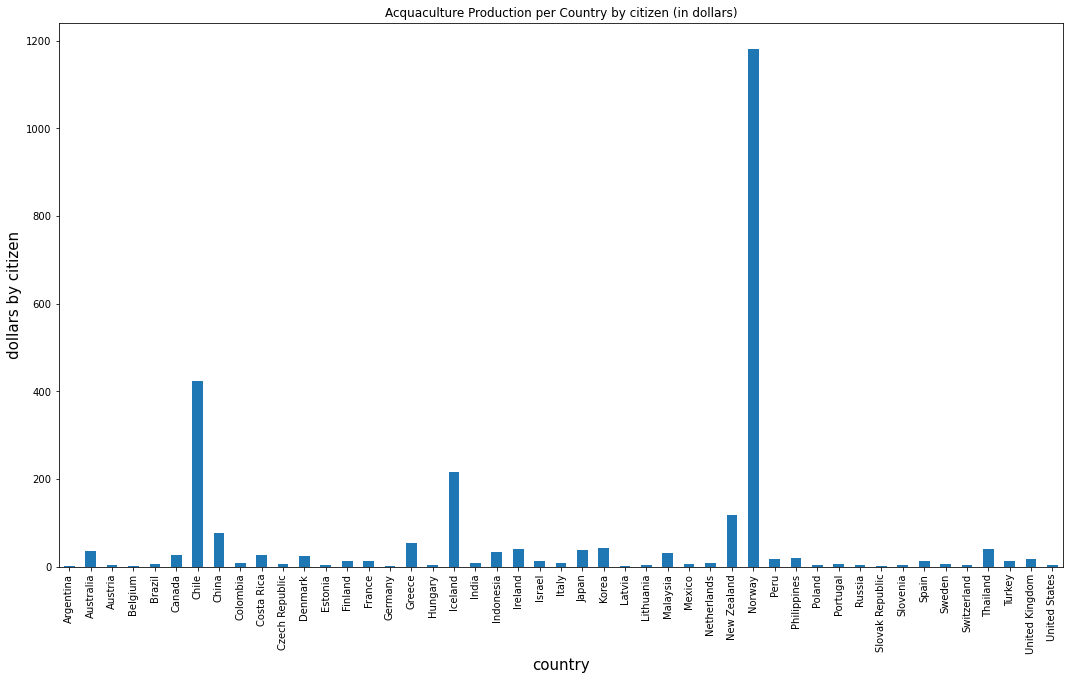

In [153]:
#graphically
data['avg'].plot(kind="bar", figsize=(18,10), fontsize=10)
plt.ylabel('dollars by citizen', fontsize='15')
plt.xlabel('country', fontsize='15')
plt.title('Acquaculture Production per Country by citizen (in dollars)')

## 3. Data Analysis

- ***Describe your data analysis and explain what you've learned about the dataset. *If relevant, talk about your machine-learning.**    

### Line graphs of Sea Surface Temperature and Coral Bleaching over the years

<AxesSubplot:title={'center':'Sea surface temperature in average for each year'}, xlabel='Year', ylabel='Celsius'>

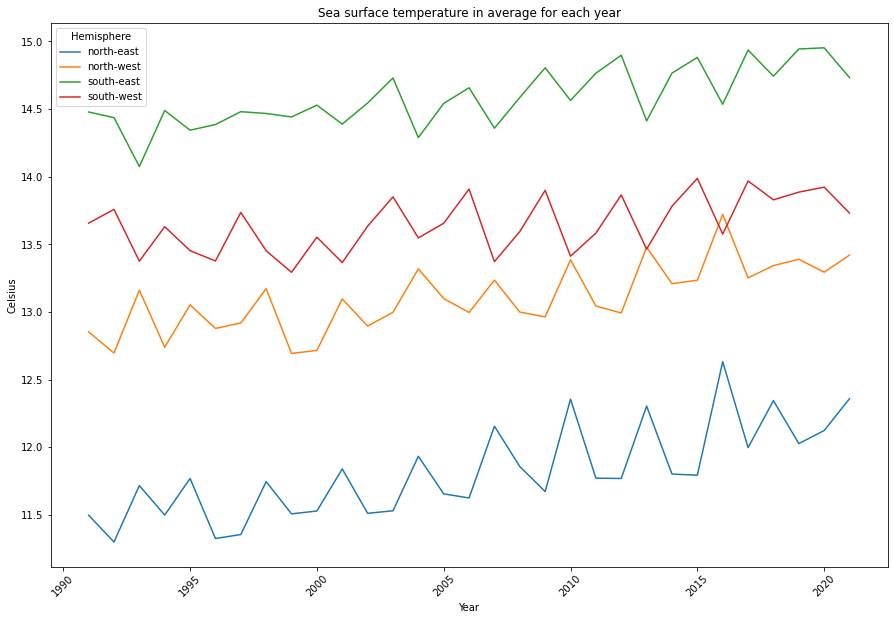

In [154]:
three_plot = sea_surface_temperature.groupby(['Year', 'Hemisphere'])['CRW_SST'].mean().unstack(1).plot(rot=45, figsize=(15,10), xlabel='Year', ylabel='Celsius', title='Sea surface temperature in average for each year')
three_plot

<AxesSubplot:title={'center':'Bleaching of corals in average for each year'}, xlabel='Year', ylabel='0-4 level of stress'>

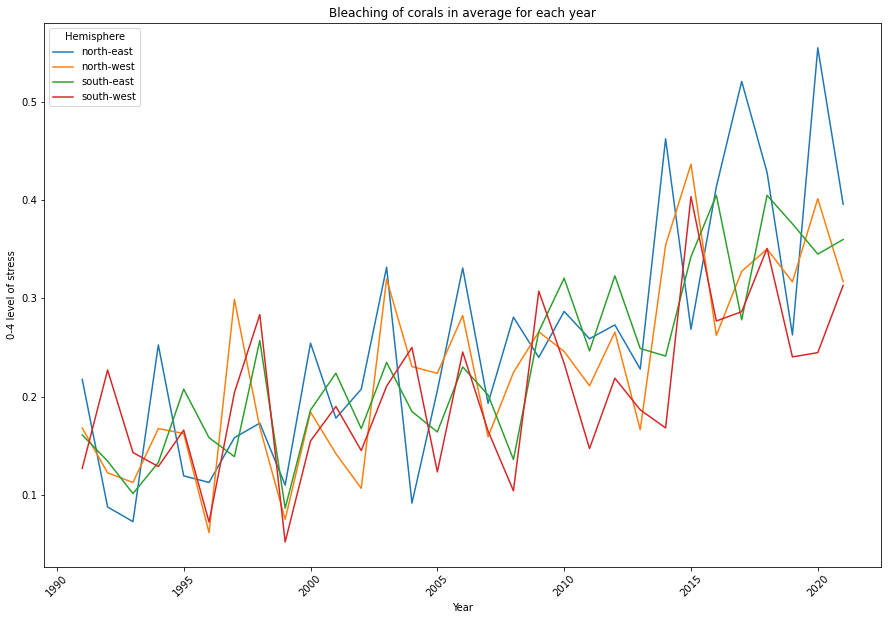

In [155]:
one_plot = coral_bleaching.groupby(['Year', 'Hemisphere'])['CRW_BAA'].mean().unstack(1).plot(rot=45, figsize=(15,10), xlabel='Year', ylabel='0-4 level of stress', title='Bleaching of corals in average for each year')
one_plot

By looking at the plot for coral bleaching and the plot for sea surface temperature, it is clear that there is a rise in both plots. And therefore we see that there can potentially be a correlation between the two plots.

### Heatmap with Coral bleaching alert level 2 in year 1990-2005

In [156]:
# create folium map
bleaching_map_before = folium.Map(location=[34.991204,-9.207783], tiles = "Cartodb Positron", zoom_start = 1.5)

# only use rows with 4.0 (bleaching alert level 2) from CRW_BAA column 
# and 1990-2005 from year column in dataframe df
heat_df_before = coral_bleaching.loc[(coral_bleaching['CRW_BAA']==4.0) & (coral_bleaching['Year']<=2005)]

heat_df_before = heat_df_before[['latitude', 'longitude']]
heat_df_before = heat_df_before.dropna(axis=0, subset=['latitude','longitude'])

# list comprehension to make out list of lists
heat_data_before = [[row['latitude'],row['longitude']] for index, row in heat_df_before.iterrows()]

# plot it on the map
HeatMap(heat_data_before, radius=10, blur=10, gradient={'0':'blue', '0.25':'yellow','0.5':'orange', '0.75':'pink','1': 'red'}).add_to(bleaching_map_before)

# display the map
bleaching_map_before

### Heatmap with Coral bleaching alert level 2 in year 2005-2020

In [157]:
# create folium map
bleaching_map_after = folium.Map(location=[34.991204,-9.207783], tiles = "Cartodb Positron", zoom_start = 1.5)

# to sure that it is float values
coral_bleaching['latitude'] = coral_bleaching['latitude'].astype(float)
coral_bleaching['longitude'] = coral_bleaching['longitude'].astype(float)

# only use rows with 4.0 (bleaching alert level 2) from CRW_BAA column 
# and 2005-2020 from year column in dataframe df
heat_df_after = coral_bleaching.loc[(coral_bleaching['CRW_BAA']==4.0) & (coral_bleaching['Year']>=2005)]

heat_df_after = heat_df_after[['latitude', 'longitude']]
heat_df_after = heat_df_after.dropna(axis=0, subset=['latitude','longitude'])

# list comprehension to make out list of lists
heat_data_after = [[row['latitude'],row['longitude']] for index, row in heat_df_after.iterrows()]

# plot it on the map
HeatMap(heat_data_after, radius=10, blur=10, gradient={'0':'blue', '0.25':'yellow','0.5':'orange', '0.75':'pink','1': 'red'}).add_to(bleaching_map_after)

# display the map
bleaching_map_after

### Time-lapse video for each data point with Coral bleaching alert level 2 from 1990-2020

In [158]:
# create folium map
bleaching_video = folium.Map(location=[34.991204,-9.207783], tiles = "Cartodb Positron", zoom_start = 1)

# only use rows with 4.0 (bleaching alert level 2) from CRW_BAA column 
heat_df_coral = coral_bleaching.loc[(coral_bleaching['CRW_BAA']==4.0)]

heat_df_coral = heat_df_coral[['latitude', 'longitude']]
heat_df_coral = heat_df_coral.dropna(axis=0, subset=['latitude','longitude'])

# adding index to each row in df (df is already sorted from 1990 to 2020 by datetime)
heat_df_coral['index_col'] = range(1, len(heat_df_coral) + 1)

# list comprehension to make out list of lists
heat_df_coral = [[[row['latitude'],row['longitude']] for index, row in heat_df_coral[heat_df_coral['index_col'] == i].iterrows()] for i in range(0,1203)]

In [159]:
# plot values on the map
hm = plugins.HeatMapWithTime(heat_df_coral, max_opacity = 10)
hm.add_to(bleaching_video)

# display the map
bleaching_video

### Heatmap with Sea surface temperature where temperture was -2.0°C from 1990-2005

In [160]:
# create folium map
sea_temp_before = folium.Map(location=[34.991204,-9.207783], tiles = "Cartodb Positron", zoom_start = 1)

# only use rows with -2.0 degrees celcius from CRW_SST column 
# and 1990-2005 from year column in dataframe
heat_df_sea_before = sea_surface_temperature.loc[(sea_surface_temperature['CRW_SST']==-2.0) & (sea_surface_temperature['Year']<=2005)]

heat_df_sea_before = heat_df_sea_before[['latitude', 'longitude']]
heat_df_sea_before = heat_df_sea_before.dropna(axis=0, subset=['latitude','longitude'])

# list comprehension to make out list of lists
heat_data_sea_before = [[row['latitude'],row['longitude']] for index, row in heat_df_sea_before.iterrows()]

# plot it on the map
HeatMap(heat_data_sea_before, radius=10, blur=10, gradient={'0':'blue', '0.25':'yellow','0.5':'orange', '0.75':'pink','1': 'red'}).add_to(sea_temp_before)

# display the map
sea_temp_before

### Heatmap with Sea surface temperature where temperture was -2.0°C from 2005-2020

In [161]:
# create folium map
sea_temp_after = folium.Map(location=[34.991204,-9.207783], tiles = "Cartodb Positron", zoom_start = 1)

# only use rows with -2.0 degrees celcius from CRW_SST column 
# and 1990-2005 from year column in dataframe
heat_df_sea_after = sea_surface_temperature.loc[(sea_surface_temperature['CRW_SST']==-2.0) & (sea_surface_temperature['Year']>=2005)]

heat_df_sea_after = heat_df_sea_after[['latitude', 'longitude']]
heat_df_sea_after = heat_df_sea_after.dropna(axis=0, subset=['latitude','longitude'])

# list comprehension to make out list of lists
heat_data_sea_after = [[row['latitude'],row['longitude']] for index, row in heat_df_sea_after.iterrows()]

# plot it on the map
HeatMap(heat_data_sea_after, radius=10, blur=10, gradient={'0':'blue', '0.25':'yellow','0.5':'orange', '0.75':'pink','1': 'red'}).add_to(sea_temp_after)

# display the map
sea_temp_after

The HeatMaps show that the sea surface temperature and the coral bleaching are both increasing from the years 1990-2005 combined and 2005-2020 combined.

### Time-lapse video of Coral bleaching with highest stress level 4 from 1991-2021

In [162]:
coral_bleaching_geo = coral_bleaching_original.copy()
coral_bleaching_geo['Date'] =  pd.to_datetime(coral_bleaching_geo['time'], format='%Y-%m-%d %H:%M:%S')
coral_bleaching_geo = coral_bleaching_geo.dropna()

In [163]:
# HeatMapWithTime with highest stress level (stress level 4)

coral_bleaching_geo['Date'] = coral_bleaching_geo['Date'].sort_values(ascending=True)
coral_bleaching_geo['Year'] = coral_bleaching_geo['Date'].dt.year
data4 = []

for _, d in coral_bleaching_geo.groupby('Year'):
    data4.append([[row['latitude'], row['longitude'], row['CRW_BAA']] for _, row in d.iterrows() if row['CRW_BAA']==4])

In [164]:
fig = folium.Figure(width=800, height=500)
map_world = folium.Map(location=[0,0], tiles = "Cartodb Positron", zoom_start=1) 

heat_map4 = HeatMapWithTime(data4, auto_play=True,max_opacity=0.8,radius=10, control=False)

heat_map4.add_to(map_world)

map_world.add_to(fig)
fig

The time-lapse video shows how the coral bleaching stress level 4 (alert level 2), which is the highest it can be, increases from 1991 to 2021.

In [165]:
# create new dataframe from coral_bleaching dataframe
new_cb = coral_bleaching.copy()
# change column name CRW_BAA to Stress Level
new_cb.columns = new_cb.columns.str.replace('CRW_BAA', 'Stress Level')
# we only wanne see 1.0 (Bleaching watch), 2.0 (Bleaching warning), 3.0 (Bleaching alert level 1) 
# and 4.0 (Bleaching alert level 2) from Sress Level column
new_cb.drop(new_cb.index[new_cb['Stress Level'] == 0.0], inplace=True)

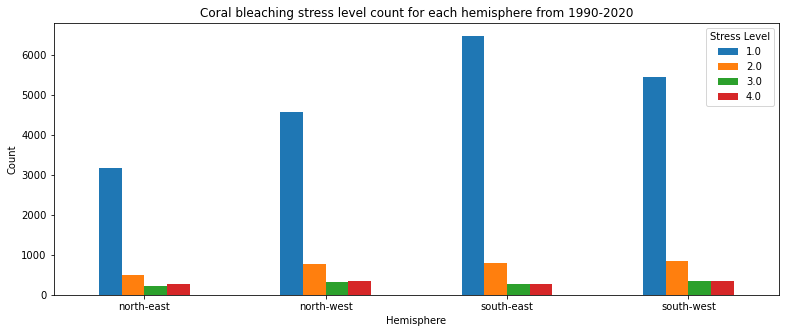

In [166]:
# pivot the data and aggregate
new_cb_pivot = new_cb.pivot_table(index='Hemisphere', columns='Stress Level', aggfunc='size')

# plot
new_cb_pivot.plot(kind='bar', figsize=(13, 5), rot=0)
plt.title("Coral bleaching stress level count for each hemisphere from 1990-2020")
plt.ylabel("Count")
plt.show()

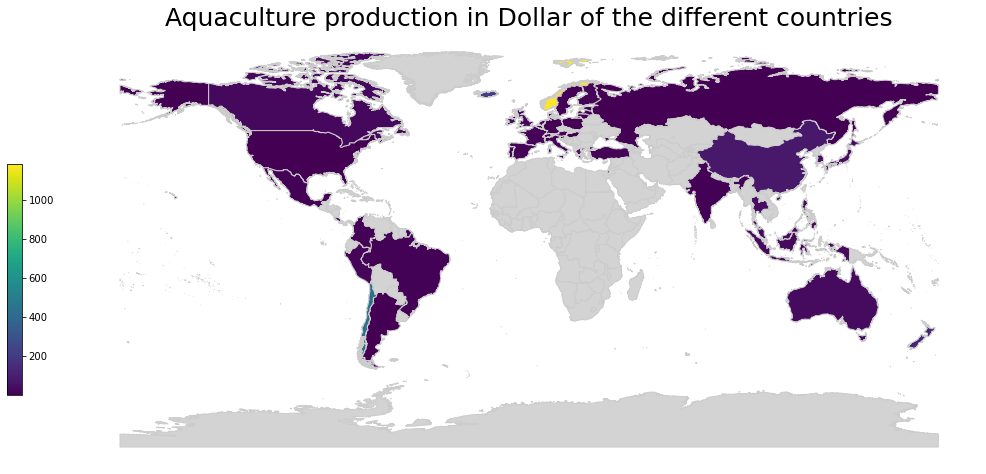

In [167]:
#the data becomes a GeoDataFrame
data_merged = GeoDataFrame(data_merged)
# Print the map
# Set the range for the choropleth
title = 'Aquaculture production in Dollar of the different countries'
col = 'avg'
vmin = data_merged[col].min()
vmax = data_merged[col].max()
cmap = 'viridis'


# Create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(20, 8))
                       
# Remove the axis
ax.axis('off')
data_merged.plot(column=col, ax=ax, edgecolor='0.8', linewidth=1, cmap=cmap,  missing_kwds={'color': 'lightgrey'})
# Add a title
ax.set_title(title, fontdict={'fontsize': '25', 'fontweight': '3'})
       
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap=cmap)

# Empty array for the data range
sm._A = []

# Add the colorbar to the figure
cbaxes = fig.add_axes([0.15, 0.25, 0.01, 0.4])
cbar = fig.colorbar(sm, cax=cbaxes)

By the Heat-Map of the Economic situation is again possible to see how Norway is the best producer (per citizen) in this field. This big difference is also the main reason of this graph to appear the same for each country. Norway, being in a higher level, stretch the scale of the other countries. The countries in grey are not in the economic dataset and therefore is impossible to draw any conclusion in regards of these.

In [168]:
#dividing by the population
for index, row in final_data.iterrows():
    final_data_tra[index]=row/country['Population'][index]

In [169]:

#Creating the animated bar chart
bcr.bar_chart_race(df=final_data_tra, n_bars=7, filter_column_colors=True, title='Acquaculture production by citizen 2005/2019',period_length=2000,fixed_max=True,figsize=(5, 3))


/Users/nicola/opt/anaconda3/lib/python3.8/site-packages/bar_chart_race/_make_chart.py:286: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(self.df_values.columns)
/Users/nicola/opt/anaconda3/lib/python3.8/site-packages/bar_chart_race/_make_chart.py:287: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([max_val] * len(ax.get_xticks()))


In this Animated Bar Chart, it is easy to see that between 2005 and 2019 there has been an increase of the production by citizen. As said before, Norway, but also Chile, are the best producers. This trend of increasing production could mean that probably the see temperature and the bleaching of the coral reefs are not influencing the production at all. What can be interesting to do, will be analysing the same trend in the next 50 years to see if something changes. To highlight is the enourmous importance that the Asiatic countries have in this sector that seems to be really well developed: in 2018 it's possible to spot Korea, China, Malaysia, Indonesia and Thailand as big producers.

### Machine learning - table used for decision tree

In [170]:
# add sea surface temperature dataset to dataframe 
dataframe = sea_surface_temperature.copy()

# add coral bleaching dataset to dataframe
dataframe['CRW_BAA'] = None
dataframe = dataframe.append(coral_bleaching)

# add economics dataset to dataframe
dataframe['average_dollars'] = None
dataframe = dataframe.append(economics)
dataframe = dataframe.fillna(value=np.nan)

In [171]:
# group by Year and then Hemisphere and calculate mean of CRW_SST, CRW_BAA and average_dollars
dataframe_grouped = dataframe.groupby(['Year', 'Hemisphere'], as_index = False).agg({'CRW_SST': 'mean', 'CRW_BAA': 'mean', 'average_dollars': 'mean'})

# this is used to predict economics from year 2020-2021, which are not in economics
dataframe_grouped_full = dataframe_grouped.copy()

# economics ends at year 2019
dataframe_grouped = dataframe_grouped.loc[dataframe_grouped["Year"] >=2005]
dataframe_grouped = dataframe_grouped.loc[dataframe_grouped["Year"] <=2019]
dataframe_grouped

,Year,Hemisphere,CRW_SST,CRW_BAA,average_dollars
56,2005,north-east,11.656311,0.206173,1.743912e+09
57,2005,north-west,13.099838,0.223674,3.414107e+08
58,2005,south-east,14.542323,0.164021,9.517707e+08
59,2005,south-west,13.656345,0.123353,9.638975e+08
60,2006,north-east,11.625879,0.330864,1.931639e+09
61,2006,north-west,12.996709,0.282508,4.083071e+08
62,2006,south-east,14.657414,0.230211,1.097401e+09
63,2006,south-west,13.908735,0.245362,1.267878e+09
64,2007,north-east,12.156158,0.193182,2.404588e+09
65,2007,north-west,13.236177,0.159021,4.116241e+08


predictions will be made on average dollars to predict economics from year 2020-2021, which are not included in the original economics dataset. The prediction is if average dollars > the mean of the column average_dollars in USD per citizen. In short, an examination will be made, to see if the fishermen's economics will increase or decrease as a result of the decrease of sea temperature and coral bleaching. <br>

In [172]:
#let's create this new column of 0/1 below/above the median
temp = []
for i in dataframe_grouped.average_dollars:
    if i > dataframe_grouped['average_dollars'].mean():
        temp.append(1)
    else:
        temp.append(0)
    
dataframe_grouped['average_dollars_pred'] = temp

In [173]:
# categorise with OneHotEncoder
dataframe_grouped=pd.get_dummies(dataframe_grouped, columns=['Hemisphere'],drop_first=False)

In [174]:
dataframe_grouped.pop('Year')
dataframe_grouped.pop('average_dollars')

# standardize
df_x = dataframe_grouped[['CRW_SST', 'CRW_BAA', 'Hemisphere_north-east', 'Hemisphere_north-west', 'Hemisphere_south-east', 'Hemisphere_south-west']]

dataframe_grouped[['CRW_SST', 'CRW_BAA', 'Hemisphere_north-east', 'Hemisphere_north-west', 'Hemisphere_south-east', 'Hemisphere_south-west']] = (df_x-df_x.mean())/df_x.std()

### Machine learning - decision tree

In [175]:
data_x = dataframe_grouped.loc[:, dataframe_grouped.columns != "average_dollars_pred"].copy()
data_y = dataframe_grouped["average_dollars_pred"].copy()

In [176]:
# Making a balanced training and test dataset
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.25, shuffle=False)

[Text(0.5416666666666666, 0.9285714285714286, 'X[2] <= 0.573\ngini = 0.444\nsamples = 45\nvalue = [30, 15]'),
 Text(0.3333333333333333, 0.7857142857142857, 'X[0] <= 1.293\ngini = 0.298\nsamples = 33\nvalue = [27, 6]'),
 Text(0.16666666666666666, 0.6428571428571429, 'X[0] <= 0.311\ngini = 0.133\nsamples = 28\nvalue = [26, 2]'),
 Text(0.08333333333333333, 0.5, 'gini = 0.0\nsamples = 17\nvalue = [17, 0]'),
 Text(0.25, 0.5, 'X[0] <= 0.414\ngini = 0.298\nsamples = 11\nvalue = [9, 2]'),
 Text(0.16666666666666666, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3333333333333333, 0.35714285714285715, 'X[1] <= -0.294\ngini = 0.18\nsamples = 10\nvalue = [9, 1]'),
 Text(0.25, 0.21428571428571427, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.4166666666666667, 0.21428571428571427, 'X[1] <= 0.057\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.3333333333333333, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5, 0.07142857142857142, 'gini

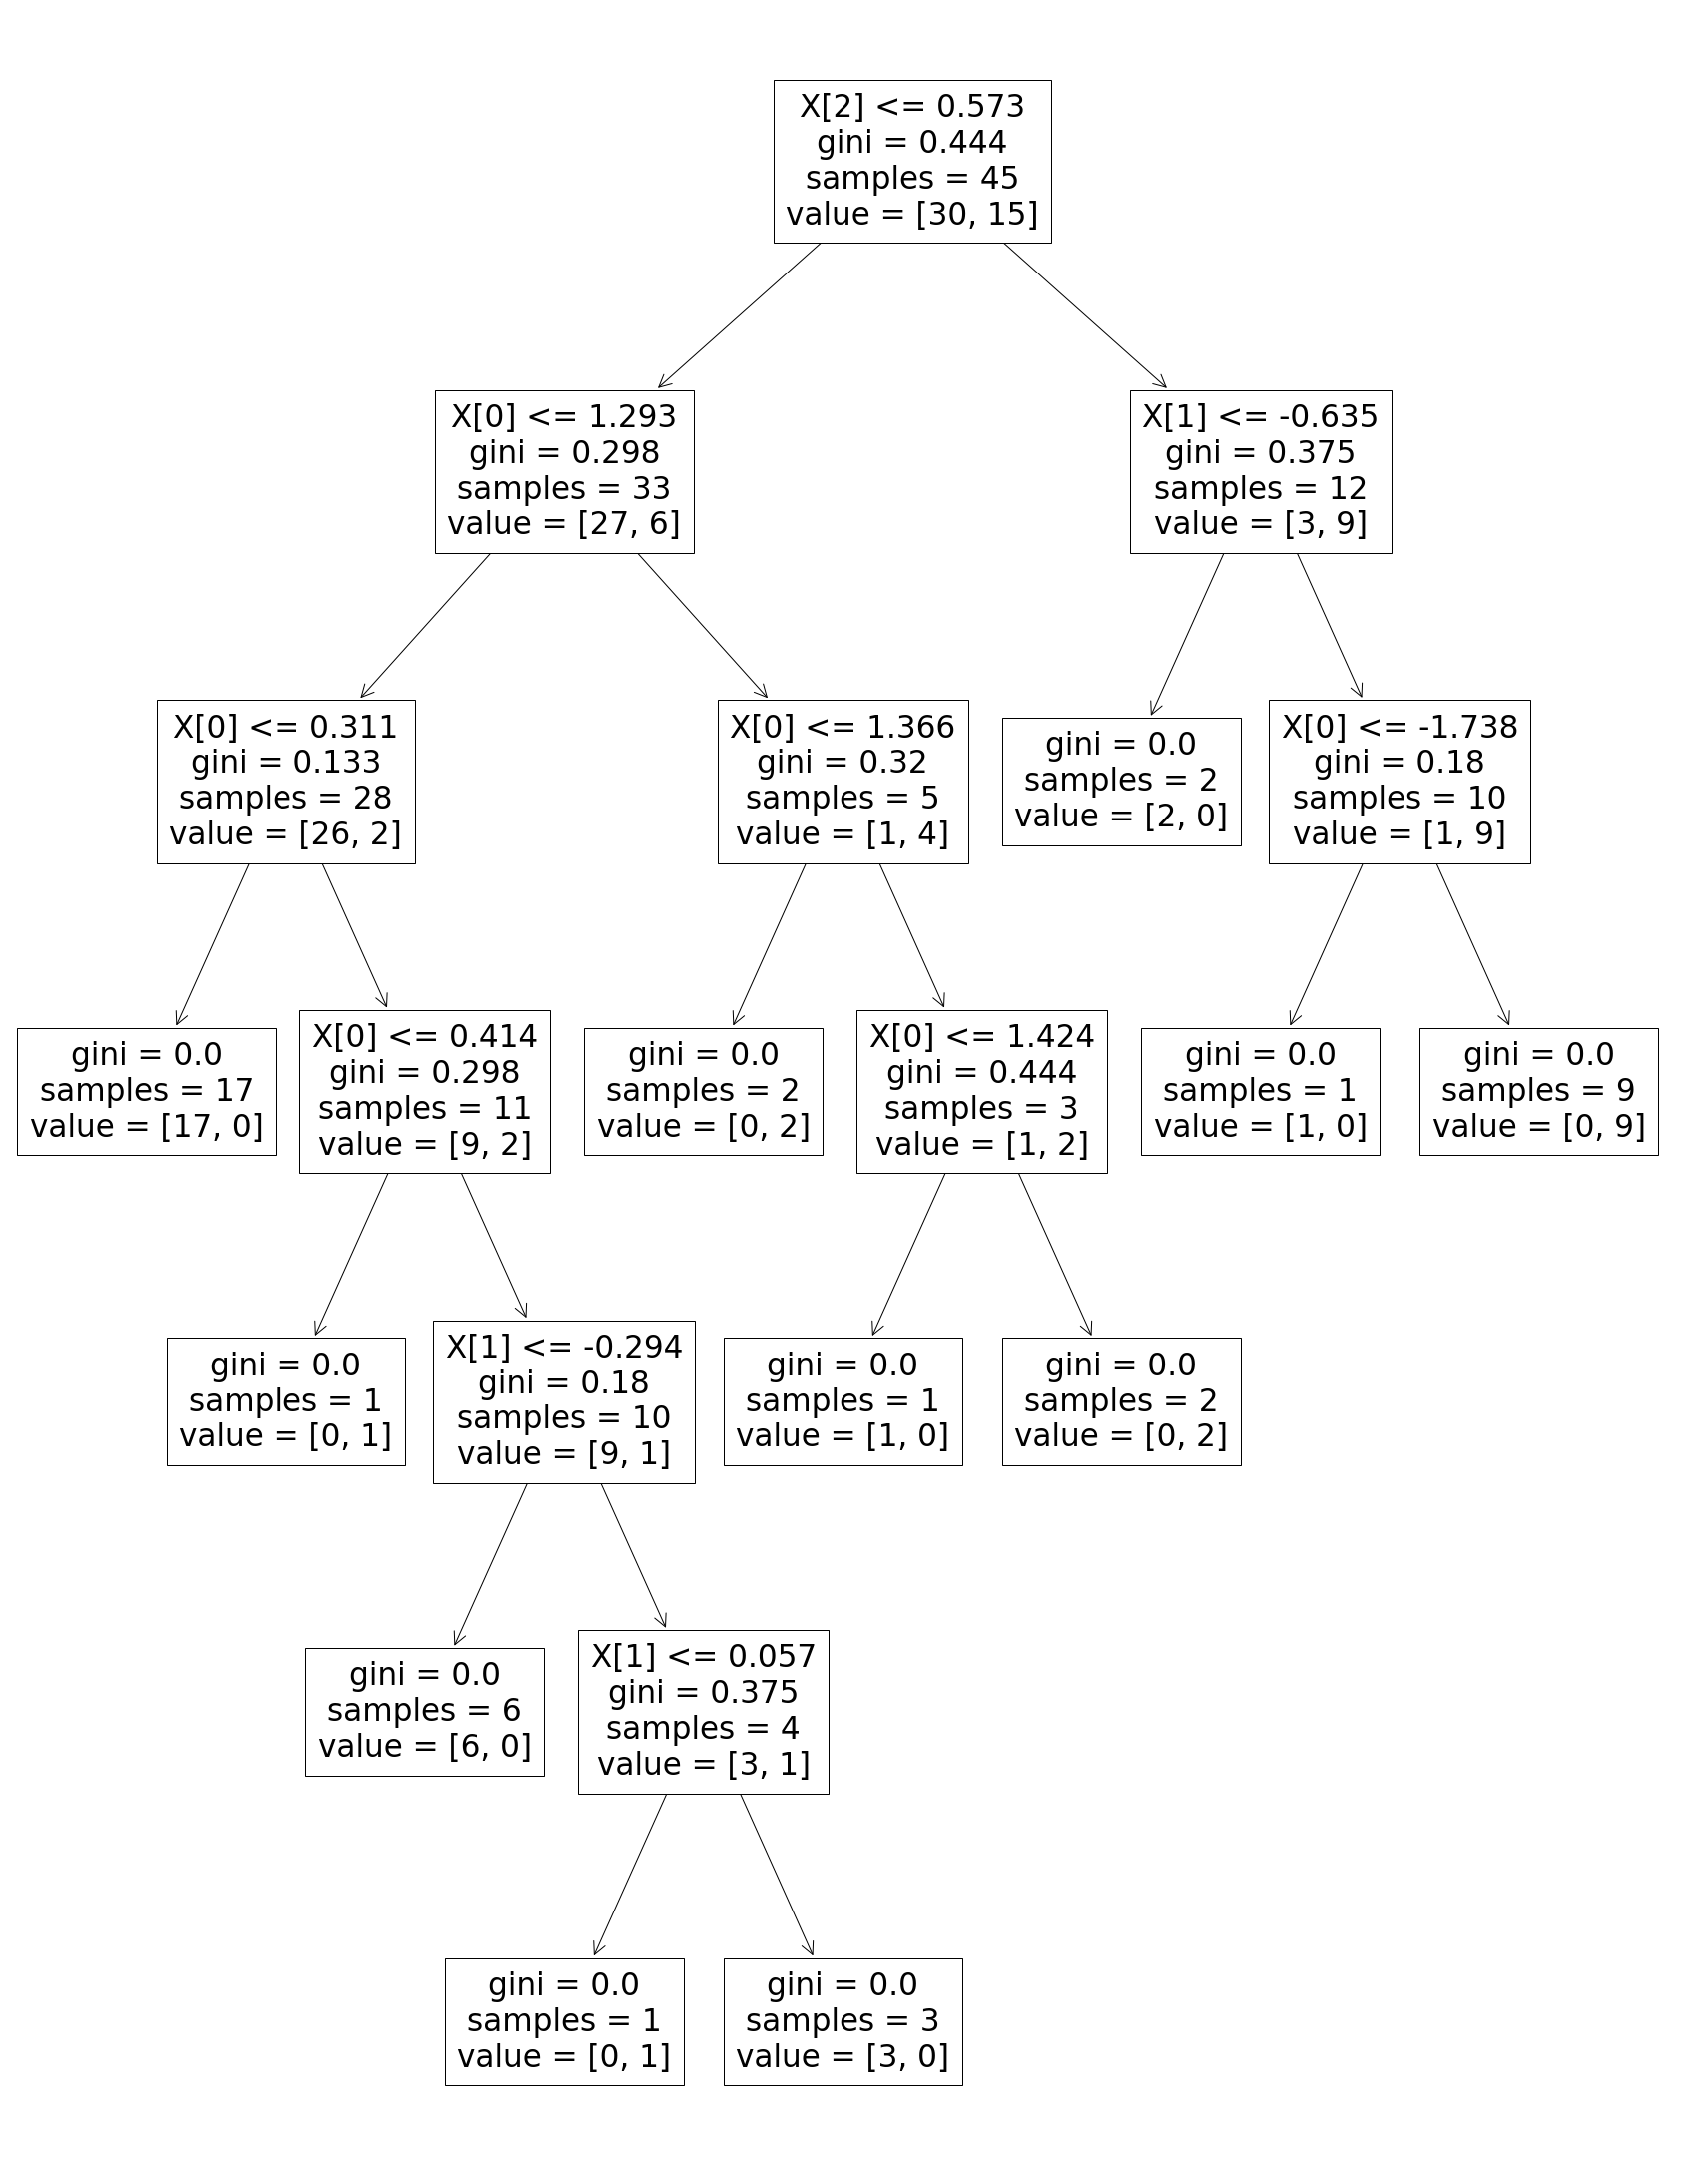

In [177]:
# Creating Decision tree
dt=DecisionTreeClassifier()
dt.fit(x_train, y_train)

fig = plt.figure(figsize=(30,40))
tree.plot_tree(dt)

### Machine learning - Mean Absolute Error, Accuracy score, Precision score, Recall score and Matrix

Mean Absolute Error: 0.33
Accuracy score:  66.67
Precision score:  85.71
Recall score:  60.0


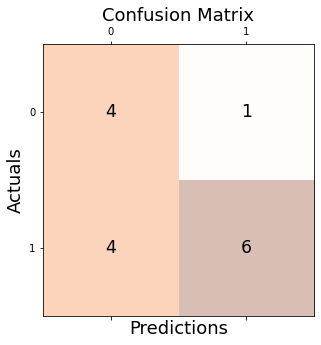

In [178]:
ypred = dt.predict(x_test)
errors = abs(ypred - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2))

#print accuracy of model
print("Accuracy score: ", round(metrics.accuracy_score(y_test, ypred)* 100,2))

#print precision value of model
print("Precision score: ",round(metrics.precision_score(y_test, ypred)* 100,2))

#print recall value of model
print("Recall score: ", round(metrics.recall_score(y_test, ypred) * 100,2))

conf_matrix = confusion_matrix(y_true=y_test, y_pred=ypred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

### Prediction: is average dollars > the mean of the column average_dollars in USD per citizen?
### 1 is yes and 0 is no

In [179]:
dataframe_grouped_temp = dataframe_grouped_full.copy()

# categorise with OneHotEncoder
dataframe_grouped_temp=pd.get_dummies(dataframe_grouped_temp, columns=['Hemisphere'],drop_first=False)

In [180]:
# only data between 2019-2021
dataframe_grouped_temp = dataframe_grouped_temp.loc[dataframe_grouped_temp["Year"] >=2020]

dataframe_grouped_temp.pop('Year')
dataframe_grouped_temp.pop('average_dollars')

# standardize
df_x2 = dataframe_grouped_temp[['CRW_SST', 'CRW_BAA', 'Hemisphere_north-east', 'Hemisphere_north-west', 'Hemisphere_south-east', 'Hemisphere_south-west']]

dataframe_grouped_temp[['CRW_SST', 'CRW_BAA', 'Hemisphere_north-east', 'Hemisphere_north-west', 'Hemisphere_south-east', 'Hemisphere_south-west']] = (df_x2-df_x2.mean())/df_x2.std()

In [181]:
x_test2 = dataframe_grouped_temp
ypred2 = dt.predict(x_test2)

In [182]:
# if average dollars > 66.03855781713617
dataframe_grouped_full = dataframe_grouped_full.loc[dataframe_grouped_full["Year"] >=2020]

dataframe_grouped_full['average_dollars'] = ypred2
dataframe_grouped_full

,Year,Hemisphere,CRW_SST,CRW_BAA,average_dollars
116,2020,north-east,12.124207,0.554893,1
117,2020,north-west,13.294366,0.401371,0
118,2020,south-east,14.952958,0.344990,0
119,2020,south-west,13.923285,0.244726,1
120,2021,north-east,12.359914,0.395800,1
121,2021,north-west,13.421363,0.317000,0
122,2021,south-east,14.732540,0.359859,1
123,2021,south-west,13.731453,0.313164,0


A decision tree is created to get Mean Absolute Error, Accuracy score, Precision score, Recall score and a Confusion matrix. The Accuracy score is 66.67% at the moment, which is not as accurate as one would hope for because 33.33% will be classified incorrectly (Absolute Error). The reason that the accuracy isn't optimal could be because our train/test set size isn't big enough to really draw a conclusion on the model or using it for real applications. Having this in mind, a prediction is made for the fishermen's economics for the years 2020 and 2021. The sea surface temperature dataset and coral bleaching dataset included these years and the fishermen's economics dataset didn't, so this was a great opportunity to predict if the fishermen's economics per year and hemisphere was greater or less than the mean of the column average_dollars in USD per citizen.

## 4. Genre

- **Which genre of data story did you use?**

    As genre we use magazine style, the website has been structured as the magazine style. Since coral reef bleaching is a important topic we wanted to reach all ages and we wanted it to be as user friendly as possible. The result from the visualisations and the time-lapse videos gives a lot of interesting to talk about and since magazine style was perfect genre for both user friendlines and writing text about visualisations we wanted to use that genre.
    
    
- **Which tools did you use from each of the 3 categories of Visual Narrative (Figure 7 in Segal and Heer). Why?**
    1. **Visual Structuring** <br>
    Using consistent visual platform, the website contains consistency. The general layout which are font, colours, background as well background images are the same throughout the different pages on the website
    
    2. **Highlighting** <br>
    Mostly we are comparing the mean for each year in sea temperature, coral reef bleaching and fisherman economics therefore using feature distinction.
    
    3. **Transition Guidance** <br>
    We are using static visualisations and time-lapse video to analyze the data, so for transition guidance we are using familiar objects were the visualisations are the objects.
    
    
- **Which tools did you use from each of the 3 categories of Narrative Structure (Figure 7 in Segal and Heer). Why?**
    1. **Ordering** <br>
    The navigation on the website is user-directed, the user must select a path among multiple alternatives. User has option to go to the home page, visualisations page or time-lapse page, but he must choose himself where to start and end.

    2. **Interactivity** <br>
    Using stimulating default views were we instead of using interactive plots chose to provide initial presentations of data and analysis intended to excite the user.

    3. **Messaging** <br>
    On the website we use captions/headlines, annotations, multi-messaging, introductory text and summary/syntehsis.

## 5. Visualizations

- **Explain the visualizations you've chosen.**
    - For the first part of the project, it has been chosen to show a *Line Chart* to analyse the trend from 1991 of the temperature and the bleaching of the coral reef. 
    - To see how the temperature changed during the years, an *Heat-Map* of the world situation has been drawn.
    - The same visualization has been chosen to represent the economic aquaculture production per citizen to see the different situation all over the World.
    - Again, taking into account this data per citizen, an *Animated Bar Chart* has been realized and it shows the situation for the best producers during the years taking into consideration (2005-2019 in this case).
    - For the classification/ML part, a *Classification Tree* has been created to show which features are important for the given classification task. Again, a *Confusion Matrix* test the classification model.
    
    
- **Why are they right for the story you want to tell?**
    - The first *Line Charts* give the trend of both the temperature and the bleaching of the coral reef. So, this is basically helpful to have an initial idea about the dataset and the main problem treated. They are a starting point for our story.
    - Showing the temperature with an *Heat-Map* confirms the previous hypotesis and gives the possibility to have a look at the problem from another (more concrete) perspective.
    - The *Heat-Map* of the economics part helps to going deeper after the bar-chart showed before and give again another point of view of the general situation regarding the acquaculture production (by citizen) in the World.
    - The *Animated Bar Chart* allows to understand how the countries production differs during the years. Also, with this visualization you can easily see how the production changed during the years for the amount of the production. This visualization becomes than crucial for every kind of final consideration. From here and the previous graphs it is easier to draw the conclusions.
    - The *Confusion Matrix* helps to evaluate the classification model created. Without this it is really difficult to understand if your model works fine, only from the score. The *Classification Tree* is instead important to evaluate the features importance and draw conclusion on which feature influence more the predicted variable.

## 6. Discussion
   
   - **What went well?**
   - **What is still missing? What could be improved? Why?**
   
   Results showed that there is a correlation between coral reef bleaching and sea temperature. It was clear on the heatmap with coral reef bleaching that the bleaching has increased and the heat map with sea temperatue showed that there has been some changes in the degrees the last couple of years. No correlation was found between coral reef bleaching and fisherman economics, conclusions about this is described on the website.
   
   The plan was to use folium to create a heatmap video where we would show how much the coral reef bleaching has grown thoughout the years, but each data point is removed when the next is shown. Maybe it would be possible to do a layered heatmap video to show this, but we chose instead to use the heatmap plots where we compare 1990-2005 and 2005-2020 which shows how much it has grown through 15 years, but in the notebook explainer it is possible to see two heatmap timelapse videos we experimented with. 
   
   As described on the website there is many factors that play a role on the changes of the fisherman economics, so to get a better result for the machine learning models all the different factors should have been included or at least the main ones. With that said, the main goal for the project was to see if there was any correlation between coral reef bleaching and fishereconomics, so therefore only these datasets where used. 
   
   For the economic part, it is possible to split the final comment in two parts: one regarding the visualization and another regarding the final aim of the analysis.<br>
    For the first part, the Visualization of the economic dataset required to merge a lot of different dataset from different sources, this brought to an enourmous work of data cleaning/preprocessing. This work is time-consuming, but then it became satisfying looking at the visualization like the Heat-Map or the Bar-Chart.<br> For the analysis part, many results have been extracted, but these were more general than really problem-related.
    
    As said above, regarding the economic part, the visualization part could have done better: the Heat-Map was realized well, but the Norway gave problem stretching all the scale: this can be adjusted somehow not divided by the population, but looking for another way to divide the general production of each country to penalize biggest countries' production. For the analysis part, the real problem is the correlation between the see temperature/coral reef bleaching that is not really strong with the fishermen's economics. The analysis didn't bring the expected result, but as mentioned before, this problem could affect this sector in the next years. This situation should be pay attention to, as stated by this Washington Post article too: https://www.washingtonpost.com/news/energy-environment/wp/2016/11/09/why-the-death-of-coral-reefs-could-be-devastating-for-millions-of-humans/. 
    
    A decision tree is created to be able to test the prediction. For this a matrix was created and from the matrix we can see that the precision of the prediction isn't as accurate as we would like it to be. The accuracy is 66.67%, meaning that there will be a lot of false-negatives and false-positives, 33.33% to be precise. This isn't surprising, because the size of the train/test set isn't big enough for actual practice. Despite this we tried to predict the fishermen’s economics for the years 2020 and 2021. The outcome is that there will be four hemispheres where the average dollars will be more than the mean of the column average_dollars in USD per citizen and four hemispheres where the average dollars will be less than the mean of the column average_dollars in USD per citizen. Based on this information it is hard to conclude if the fishermen's economics will increase or decrease as a result of the decrease of sea temperature and coral bleaching. For this project, that doesn't conclude much for the years of 2020 and 2021 or even the future. As mentioned before, this decision tree is not ideal to test or predict with.

## Contributions

**ST116:**
1. Done this:
    - Researched idea and datasets for project A – `Idea was to use:` Coral Reef and Sea Temperature datasets
    - Added files containg code and structured notebook explainer
    - Wrote in explainer notebook:
        - 1 Motivation
        - 2 Basic stats - About Coral Reef and Sea Temperature
        - 3 Data Analysis
        - 6 Discussions
2. Developed:
    - Cleaning and preprocessing data for Coral Reef and Sea Temperture
    - Merged the three datasets to create Decision Tree and Confusion Matrix
    - Code for visualisations mentioned below
3. Visualisations:
    - Line plot with Coral Reef throughout the years (Fig. 2)
    - Line plot with Sea Temperature throughout the years (Fig. 3)
    - Timelapse video "Time-lapse video of Coral bleaching with highest stress level 4 from 1991-2021" (on notebook explainer)
    - Decision Tree (Fig. 8)
    - Confusion Matrix (Fig. 9)
    - Prediction table (Fig. 10)
        
**ST18:**
1. Done this:
    - Researched idea and datasets for project A – `Idea was to use:` Coral Reef and Sea Temperature datasets
    - Created the video for project A
    - Created website:
        - Did the design
        - Added plots
        - Wrote text
    - Wrote in explainer notebook:
        - 4 Genre
        - 6 Discussions
2. Developed:
    - Cleaning and preprocessing data for Coral Reef and Sea Temperture
    - Website
    - Code for visualisations mentioned below
3. Visualisations:
    - Bar plot with coral reef stress level (Fig. 1)
    - Heatmap with coral bleaching stress level (Fig. 4)
    - Heatmap with sea temperature (Fig. 5)
    - Timelapse video "Time-lapse video for each data point with Coral bleaching alert level 2 from 1990-2020" (on notebook explainer)
        
**ST118:**
1. Done this:
    - In project A - `Added to the idea:` Fishermen Economics and Countries of the World datasets
    - Wrote in explainer notebook:
        - 2 Basic stats - About Fishermen economics and Countries of the World
        - 5 Visualizations
        - 6 Discussions
2. Developed:
    - Cleaning and preprocessing data for Fishermen Economics and Countries of the World datasets
    - Merged Fishermen Economics and Countries of the World
    - Added longitude and latitude to the countries in merged dataset
    - Contributed to decision tree and confusion matrix
    - Code for visualisations mentioned below
3. Visualisations:
    - World map with aquaculture production in dollar in countries pr. citizen (Fig. 6)
    - Bar plot with aquaculture production in dollar in countries pr. citizen (Fig. 7)
    - Aquaculture production by citizen from 2005 to 2019 (on website in menu "time-lapse videos")

In [1]:
%%html
<script src="https://cdn.rawgit.com/parente/4c3e6936d0d7a46fd071/raw/65b816fb9bdd3c28b4ddf3af602bfd6015486383/code_toggle.js"></script>